<a href="https://colab.research.google.com/github/parsa-gholampour/classification-SVM-multiclass/blob/main/classification_SVM_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
all_ds = pd.read_csv('iris-dataset.csv')
all_ds

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [10]:
print(f'Number of rows/examples and columns in the dataset: {all_ds.shape}')

Number of rows/examples and columns in the dataset: (150, 5)


In [11]:
# Summary of information on the dataset.
all_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Cleaning the data.

In [12]:
print("Display NA values in each columns: ")
all_ds.isna().sum(axis=0)

Display NA values in each columns: 


sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [13]:
print("Display NULL values in each columns: ")
all_ds.isnull().sum()

Display NULL values in each columns: 


sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [ ]:
all_ds = all_ds.dropna()

In [14]:

all_ds = all_ds.sample(frac=1) # This will randomly shuffle the rows to make sure the data is not sorted. (if the data is sorted then we may end up with test dataset from one or two classes only)


In [15]:
label_encoder = LabelEncoder()

In [17]:
all_ds['variety'] = label_encoder.fit_transform(all_ds['variety'])

In [18]:
all_ds

,sepal.length,sepal.width,petal.length,petal.width,variety
125,7.2,3.2,6.0,1.8,2
34,4.9,3.1,1.5,0.2,0
37,4.9,3.6,1.4,0.1,0
0,5.1,3.5,1.4,0.2,0
77,6.7,3.0,5.0,1.7,1
...,...,...,...,...,...
143,6.8,3.2,5.9,2.3,2
111,6.4,2.7,5.3,1.9,2
10,5.4,3.7,1.5,0.2,0
55,5.7,2.8,4.5,1.3,1


# Split the data into train/test splits.

In [19]:
# Split the data into 60% train and 40% test (later will divide the test to test and validate.)
train_dataset, temp_test_dataset =  train_test_split(all_ds, test_size=0.4)

print( train_dataset.shape )
print( temp_test_dataset.shape )

(90, 5)
(60, 5)


In [20]:
# Split the test_dataset dataframe to 50% test and 50% validation. [this will divide the dataset into 60% train, 20% validate, and 20% test]
test_dataset, valid_dataset =  train_test_split(temp_test_dataset, test_size=0.5)
print( test_dataset.shape )
print( valid_dataset.shape )

(30, 5)
(30, 5)


In [23]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f"Train dataset: {train_dataset.shape}")
print(f"Test dataset: {test_dataset.shape}")
print(f"Validation dataset: {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
Train dataset: (90, 5)
Test dataset: (30, 5)
Validation dataset: (30, 5)


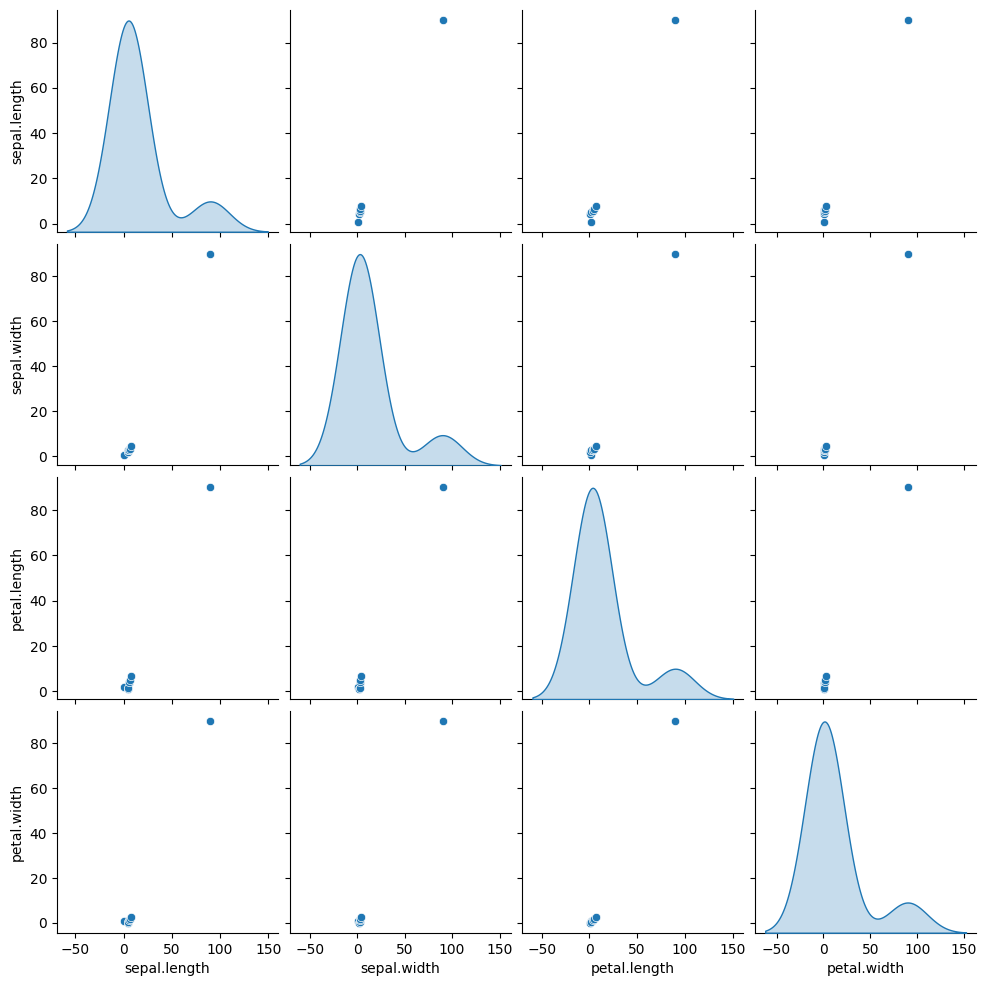

In [25]:
# Plot the relationship between each two variables to spot anything incorrect.
train_stats = train_dataset.describe()
train_stats.pop("variety")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde")


In [27]:
# Statistics on the train dataset to make sure it is in a good shape. (you may display the same stat for test and validate)
train_stats = train_dataset.describe()
train_stats.pop("variety")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
sepal.length,90.0,5.782222,0.823200,4.4,5.1,5.7,6.375,7.7
sepal.width,90.0,3.073333,0.475891,2.0,2.8,3.0,3.400,4.4
petal.length,90.0,3.601111,1.820575,1.0,1.5,4.0,5.100,6.7
petal.width,90.0,1.133333,0.788684,0.1,0.2,1.3,1.800,2.5


In [28]:

train_labels = train_dataset.pop('variety')
test_labels = test_dataset.pop('variety')
valid_labels = valid_dataset.pop('variety')

# Data Normalization/Scaling
## Subtract the mean of the training data and divide by the standard deviation of the training data.

In [29]:
# define a function to normalize the data set

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)


In [30]:
# show a sample of the data after normalized
normed_train_data.head(10)

,sepal.length,sepal.width,petal.length,petal.width
7,-0.950222,0.686432,-1.154092,-1.183406
54,0.871936,-0.574362,0.548667,0.464909
123,0.628982,-0.784494,0.713450,0.845290
105,2.208185,-0.154097,1.647221,1.225670
98,-0.828744,-1.204759,-0.330177,-0.042264
26,-0.950222,0.686432,-1.099164,-0.929819
10,-0.464313,1.316829,-1.154092,-1.183406
113,-0.099881,-1.204759,0.768378,1.098877
60,-0.950222,-2.255420,-0.055538,-0.169058
66,-0.221358,-0.154097,0.493739,0.464909


# Training the model

In [31]:
#Create a svm Classifier
model = svm.SVC(C = 1, kernel='linear')

#Train the model using the training sets
model.fit(normed_train_data, train_labels)

#Predict the response for test dataset
y_pred = model.predict(normed_test_data)

In [32]:
example_batch = normed_test_data[:10]
example_result = model.predict(example_batch)
print('predicted values: ')
example_result

predicted values: 


array([1, 0, 1, 0, 2, 0, 0, 1, 2, 2])

# Evaluation

In [33]:
from sklearn import metrics

y_pred = model.predict(normed_train_data)
print("Accuracy:",metrics.accuracy_score(train_labels, y_pred))

Accuracy: 0.9777777777777777


In [34]:
y_pred = model.predict(normed_valid_dataset)
print("Accuracy:",metrics.accuracy_score(valid_labels, y_pred))

Accuracy: 0.9666666666666667


In [35]:
y_pred = model.predict(normed_test_data)
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.9666666666666667


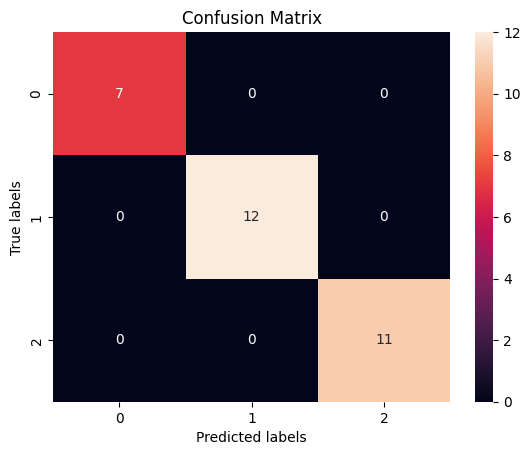

In [36]:
from sklearn.metrics import confusion_matrix


ax= plt.subplot()
predict_results = model.predict(normed_test_data)

cm = confusion_matrix(predict_results, predict_results)

sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

# ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);
